# Random Forest

In [387]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from prepare import train_val_test, prep_titanic, metrics, rubric

1) Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [388]:
#assigning prep_titanic to df

df = prep_titanic()

In [389]:
# splitting the titanic dataframe into training, validation, and test sets.

train, val, test = train_val_test(df, strat = 'survived')

In [390]:
#encoding the sex, class and embark town categorical columns in the train set and dropping the female_sex col.

train = pd.get_dummies(train, columns = ['sex'], drop_first = True)
train = pd.get_dummies(train, columns = ['class', 'embark_town'])
train.head()

,survived,age,sibsp,parch,fare,alone,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
748,0,19.0,1,0,53.1000,0,True,True,False,False,False,False,True
45,0,28.0,0,0,8.0500,1,True,False,False,True,False,False,True
28,1,28.0,0,0,7.8792,1,False,False,False,True,False,True,False
633,0,28.0,0,0,0.0000,1,True,True,False,False,False,False,True
403,0,28.0,1,0,15.8500,0,True,False,False,True,False,False,True


In [391]:
#encoding the sex, class and embark town categorical columns in the val set and dropping the female_sex col.

val = pd.get_dummies(val, columns = ['sex'], drop_first = True)
val = pd.get_dummies(val, columns = ['class', 'embark_town'])
val.head()

,survived,age,sibsp,parch,fare,alone,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
377,0,27.0,0,2,211.500,0,True,True,False,False,True,False,False
244,0,30.0,0,0,7.225,1,True,False,False,True,True,False,False
72,0,21.0,0,0,73.500,1,True,False,True,False,False,False,True
815,0,28.0,0,0,0.000,1,True,True,False,False,False,False,True
841,0,16.0,0,0,10.500,1,True,False,True,False,False,False,True


In [392]:
#making sure train and val have the same # of columns

train.shape, val.shape

((623, 13), (134, 13))

In [393]:
# creating an X & y version of train and val, where y is a series with just the target variable and X are all the features.

X_train = train.drop(columns = 'survived')
y_train = train.survived

X_val = val.drop(columns = 'survived')
y_val = val.survived

In [394]:
# creating a baseline of the most occuring number in the survived column

(y_train == 0).mean()

0.6163723916532905

baseline accuracy is 62%

In [395]:
#verifying that x and y train have the same amount of rows

X_train.shape[:1], y_train.shape[:1]

((623,), (623,))

In [396]:
#creating a model and fitting it to our train set

seed = 42

rf = RandomForestClassifier(max_depth = 10, min_samples_leaf = 1, random_state = seed)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [397]:
train_acc = rf.score(X_train, y_train)
train_acc

0.956661316211878

In [398]:
val_acc = rf.score(X_val, y_val)
val_acc

0.835820895522388

In [399]:
rf.feature_importances_

array([0.21785056, 0.04086637, 0.0439032 , 0.22506522, 0.02060527,
       0.29997892, 0.03316814, 0.01503671, 0.06026992, 0.01566116,
       0.0086779 , 0.01891662])

In [400]:
np.array([0.21785056, 0.04086637, 0.0439032 , 0.22506522, 0.02060527,
       0.29997892, 0.03316814, 0.01503671, 0.06026992, 0.01566116,
       0.0086779 , 0.01891662]).sum()

0.9999999900000001

In [401]:
fi = pd.DataFrame({'feature' : X_train.columns,
              'importance' : rf.feature_importances_})

fi.sort_values(by = 'importance', ascending = False)

,feature,importance
5,sex_male,0.299979
3,fare,0.225065
0,age,0.217851
8,class_Third,0.060270
2,parch,0.043903
1,sibsp,0.040866
6,class_First,0.033168
4,alone,0.020605
11,embark_town_Southampton,0.018917
9,embark_town_Cherbourg,0.015661


creating a visualization to show the train and validate accuracy as depth increases.

In [402]:
seed = 42
train_acc = []
val_acc = []
depth = []
min_samples_leaf = []

for i in range(2, 13):

        rf = RandomForestClassifier(max_depth = i, min_samples_leaf = 1, random_state = seed)
    
        rf.fit(X_train, y_train)
    
        train_acc.append(rf.score(X_train, y_train))
    
        val_acc.append(rf.score(X_val, y_val))
    
        depth.append(i)

        min_samples_leaf.append(n)

In [403]:
trees = pd.DataFrame({'max_depth' : depth, 'train_acc' : train_acc, 'val_acc' : val_acc, 'min_sample_leaf' : min_samples_leaf})
trees

,max_depth,train_acc,val_acc,min_sample_leaf
0,2,0.810594,0.820896,4
1,3,0.829856,0.835821,4
2,4,0.849117,0.828358,4
3,5,0.860353,0.828358,4
4,6,0.878010,0.835821,4
5,7,0.903692,0.835821,4
6,8,0.934189,0.843284,4
7,9,0.942215,0.843284,4
8,10,0.956661,0.835821,4
9,11,0.961477,0.843284,4


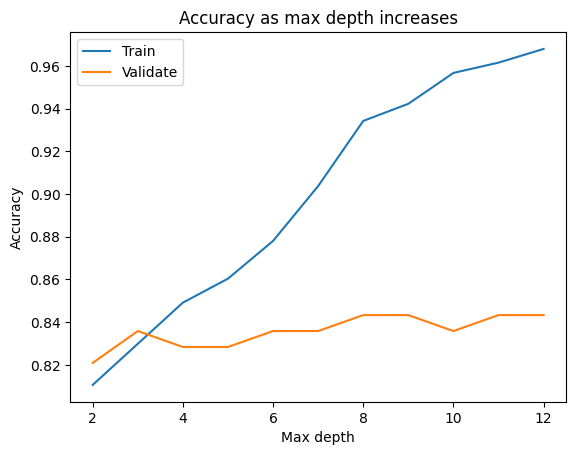

In [404]:
plt.plot(trees.max_depth, trees.train_acc, label = 'Train')
plt.plot(trees.max_depth, trees.val_acc, label = 'Validate')
plt.ylabel('Accuracy')
plt.xlabel('Max depth')
plt.title('Accuracy as max depth increases')
plt.legend()
plt.show()

2) Evaluate your results using the model score, confusion matrix, and classification report.

### model score

In [405]:
rf.score(X_train, y_train)

0.9678972712680578

### confusion matrix

In [406]:
t_pred = rf.predict(X_train)
t_pred[:5]

array([0, 0, 1, 0, 0])

In [407]:
v_pred = rf.predict(X_val)
v_pred[:5]

array([0, 0, 0, 0, 0])

In [408]:
#creating a crosstab for the val confising matrix

pd.crosstab(y_val, v_pred)

col_0,0,1
survived,,
0,75,7
1,14,38


In [409]:
#creating a crosstab for the train confising matrix

ct = pd.crosstab(y_train, t_pred)
ct

col_0,0,1
survived,,
0,382,2
1,18,221


### classification report

In [410]:
print(classification_report(y_train, t_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       384
           1       0.99      0.92      0.96       239

    accuracy                           0.97       623
   macro avg       0.97      0.96      0.97       623
weighted avg       0.97      0.97      0.97       623



3) Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [411]:
ct

col_0,0,1
survived,,
0,382,2
1,18,221


#### accuracy

In [412]:
acc = (382 + 221) / (382 + 221 + 18 + 2)
acc

0.9678972712680578

#### true positive rate

In [413]:
tpr = 382 / (382 + 2)
tpr

0.9947916666666666

#### false positive rate

In [414]:
fpr = 18 / (18 + 221)
fpr

0.07531380753138076

#### true negative rate

In [415]:
tnr = 221 / (221 + 18)
tnr

0.9246861924686193

#### false negative rate

In [416]:
fnr = 2 / (2 + 382)
fnr

0.005208333333333333

#### precision

In [417]:
pre = 382 / (382 + 18)
pre

0.955

#### recall

In [418]:
rec = 382 / (382 + 2)
rec

0.9947916666666666

#### f1-score

In [419]:
f1 = 2 * (pre * rec) / (pre + rec)
f1

0.9744897959183673

#### support

In [420]:
sup = 382 + 2
sup

384

### validate accuracy score

In [421]:
rf.score(X_val, y_val)

0.8432835820895522

4) Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [422]:
seed = 42
train_acc = []
val_acc = []
depth = []
min_samples_leaf = []

for i in (reversed(range(2, 5))):

    for n in range(2, 5):

        rf = RandomForestClassifier(max_depth = i, min_samples_leaf = n, random_state = seed)
    
        rf.fit(X_train, y_train)
    
        train_acc.append(rf.score(X_train, y_train))
    
        val_acc.append(rf.score(X_val, y_val))
    
        depth.append(i)

        min_samples_leaf.append(n)

In [423]:
trees = pd.DataFrame({'max_depth' : depth, 'train_acc' : train_acc, 'val_acc' : val_acc, 'min_sample_leaf' : min_samples_leaf})
trees

,max_depth,train_acc,val_acc,min_sample_leaf
0,4,0.845907,0.828358,2
1,4,0.842697,0.820896,3
2,4,0.845907,0.843284,4
3,3,0.833066,0.835821,2
4,3,0.833066,0.835821,3
5,3,0.831461,0.835821,4
6,2,0.810594,0.820896,2
7,2,0.810594,0.820896,3
8,2,0.808989,0.820896,4


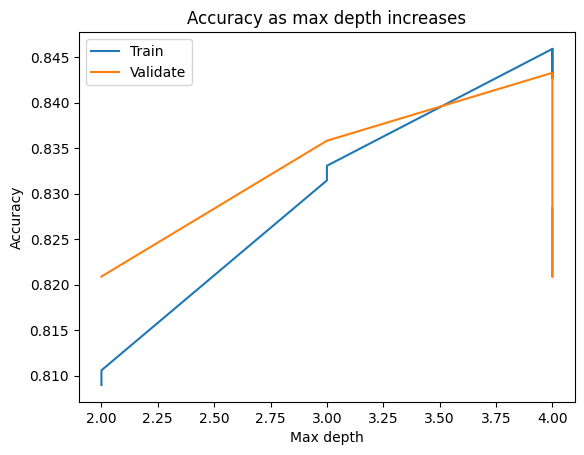

In [424]:
plt.plot(trees.max_depth, trees.train_acc, label = 'Train')
plt.plot(trees.max_depth, trees.val_acc, label = 'Validate')
plt.ylabel('Accuracy')
plt.xlabel('Max depth')
plt.title('Accuracy as max depth increases')
plt.legend()
plt.show()

### max_depth = 8 and min_samples_leaf = 2

In [425]:
#increasing min_samples_leaf to 2 and max depth to 8

seed = 42

rf = RandomForestClassifier(max_depth = 8, min_samples_leaf = 2, random_state = seed)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=2, random_state=42)

In [426]:
t_acc = rf.score(X_train, y_train)
t_acc

0.9036918138041734

In [427]:
v_acc = rf.score(X_val, y_val)
v_acc

0.8208955223880597

In [428]:
rf.feature_importances_

array([0.15787344, 0.04309999, 0.04410571, 0.17592057, 0.0229972 ,
       0.37413902, 0.04206108, 0.01594644, 0.07999934, 0.01521036,
       0.00862079, 0.02002604])

In [429]:
np.array([0.15787344, 0.04309999, 0.04410571, 0.17592057, 0.0229972 ,
       0.37413902, 0.04206108, 0.01594644, 0.07999934, 0.01521036,
       0.00862079, 0.02002604]).sum()

0.99999998

In [430]:
fi = pd.DataFrame({'feature' : X_train.columns,
              'importance' : rf.feature_importances_})

fi.sort_values(by = 'importance', ascending = False)

,feature,importance
5,sex_male,0.374139
3,fare,0.175921
0,age,0.157873
8,class_Third,0.079999
2,parch,0.044106
1,sibsp,0.043100
6,class_First,0.042061
4,alone,0.022997
11,embark_town_Southampton,0.020026
7,class_Second,0.015946


In [431]:
seed = 42
t_acc = []
v_acc = []
depth = []

for i in range(2, 11):

    rf = RandomForestClassifier(max_depth = i, min_samples_leaf = 2, random_state = seed)

    rf.fit(X_train, y_train)

    t_acc.append(rf.score(X_train, y_train))

    v_acc.append(rf.score(X_val, y_val))

    depth.append(i)

In [432]:
trees = pd.DataFrame({'max_depth' : depth, 'train_acc' : t_acc, 'val_acc' : v_acc})
trees

,max_depth,train_acc,val_acc
0,2,0.810594,0.820896
1,3,0.833066,0.835821
2,4,0.845907,0.828358
3,5,0.858748,0.828358
4,6,0.868379,0.828358
5,7,0.889246,0.850746
6,8,0.903692,0.820896
7,9,0.911717,0.835821
8,10,0.914928,0.850746


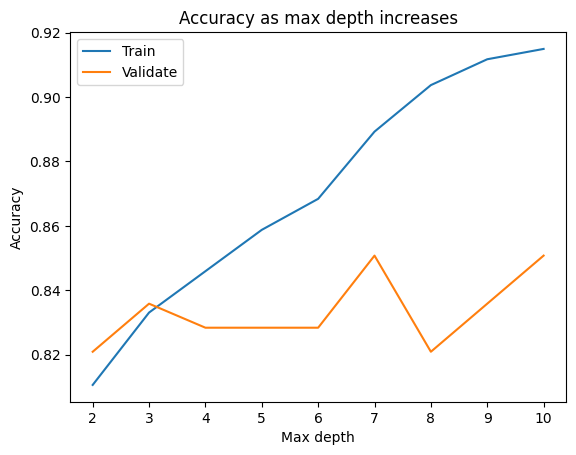

In [433]:
plt.plot(trees.max_depth, trees.train_acc, label = 'Train')
plt.plot(trees.max_depth, trees.val_acc, label = 'Validate')
plt.ylabel('Accuracy')
plt.xlabel('Max depth')
plt.title('Accuracy as max depth increases')
plt.legend()
plt.show()

### model score

In [434]:
#train model score

rf.score(X_train, y_train)

0.9149277688603531

### confusion matrix

In [435]:
t_pred = rf.predict(X_train)
t_pred[:5]

array([0, 0, 1, 0, 0])

In [436]:
v_pred = rf.predict(X_val)
v_pred[:5]

array([0, 0, 0, 0, 0])

In [437]:
pd.crosstab(y_train, t_pred)

col_0,0,1
survived,,
0,369,15
1,38,201


In [438]:
pd.crosstab(y_val, v_pred)

col_0,0,1
survived,,
0,76,6
1,14,38


### classification report

In [439]:
#train classification report

print(classification_report(y_train, t_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       384
           1       0.93      0.84      0.88       239

    accuracy                           0.91       623
   macro avg       0.92      0.90      0.91       623
weighted avg       0.92      0.91      0.91       623



In [440]:
#val classification report

print(classification_report(y_val, v_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88        82
           1       0.86      0.73      0.79        52

    accuracy                           0.85       134
   macro avg       0.85      0.83      0.84       134
weighted avg       0.85      0.85      0.85       134



In [441]:
pd.crosstab(y_train, t_pred)

col_0,0,1
survived,,
0,369,15
1,38,201


#### accuracy

In [442]:
acc2 = (369 + 201) / (369 + 201 + 38 + 15)
acc2

0.9149277688603531

#### true positive rate

In [443]:
tpr2 = 369 / (369 + 15)
tpr2

0.9609375

#### false positive rate

In [444]:
fpr2 = 38 / (38 + 201)
fpr2

0.1589958158995816

#### true negative rate

In [445]:
tnr2 = 201 / (201 + 38)
tnr2

0.8410041841004184

#### false negative rate

In [446]:
fnr2 = 15 / (15 + 369)
fnr2

0.0390625

#### precision

In [447]:
pre2 = 369 / (369 + 38)
pre2

0.9066339066339066

#### recall

In [448]:
rec2 = 369 / (369 + 15)
rec2

0.9609375

In [449]:
f1_2 = 2 * (pre * rec) / (pre + rec)
f1_2

0.9744897959183673

#### support

In [450]:
sup2 = 369 + 15
sup2

384

### validate accuracy

In [451]:
#val model score

rf.score(X_val, y_val)

0.8507462686567164

5) What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [452]:
data = {
    '': ['accuracy', 'tpr', 'fpr', 'tnr', 'fnr', 'pre', 'rec', 'f1'] ,
    '1st_model': [acc, tpr, fpr, tnr, fnr, pre, rec, f1],
    '2nd_model': [acc2, tpr2, fpr2, tnr2, fnr2, pre2, rec2, f1_2], 
}

model = round(pd.DataFrame(data),2)
model.set_index('', inplace=True)
model['Difference'] = model['1st_model'] - model['2nd_model']

In [453]:
model

,1st_model,2nd_model,Difference
,,,
accuracy,0.97,0.91,0.06
tpr,0.99,0.96,0.03
fpr,0.08,0.16,-0.08
tnr,0.92,0.84,0.08
fnr,0.01,0.04,-0.03
pre,0.96,0.91,0.05
rec,0.99,0.96,0.03
f1,0.97,0.97,0.00
